# Elección de modelo ML

## Dependencia de la cantidad de data

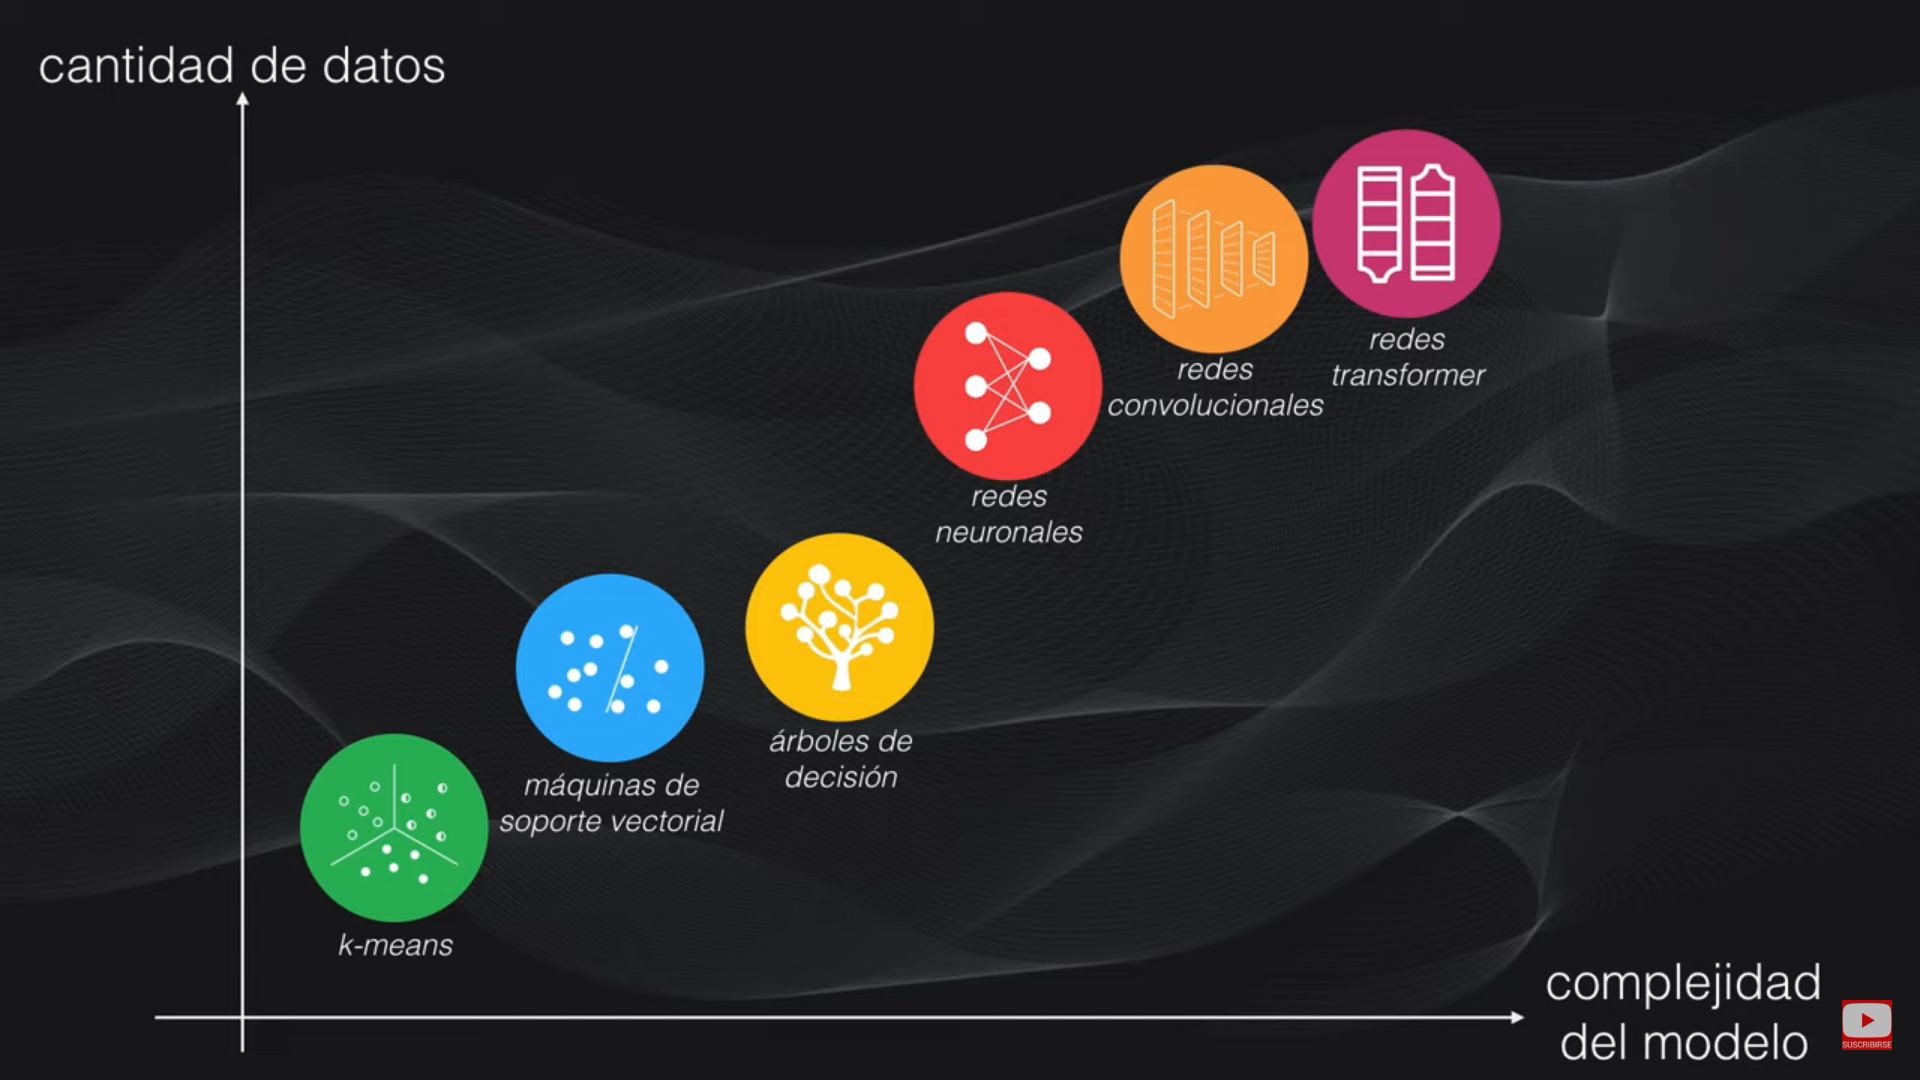

# Modelo de calculo de radiación

## Modelo Bristow-Campbell

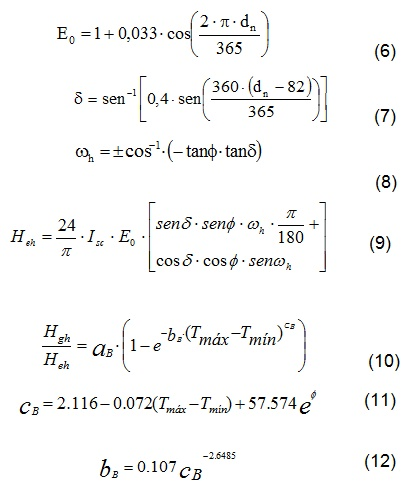

d_n: Día Juliano

pi : 3.14159265

\Delta : declinación solar

\Phi : latitud

\Theta_h : angulo horario

E_0 : factor de corrección de excentricidad de la órbita terrestre

I_sc : constante solar

H_eh : radiación solar incidente extraterrestre en un plano horizontal

c_B : 

T_min : temperatura mínima

T_max: temperatura máxima

b_B : 

a_B : 

H_gh : radiación solar global en un plano horizontal

## Modelo de Bird y Hulstrom

(Sacado del iqbal)
Este modelo se basa en dos estudios de Bird y Hulstrom [15, 16].

En el primer estudio [15] Bird y Hulstrom llevaron a cabo una comparación detallada de un gran número de modelos de insolación directa.

Compararon elementos individuales de varios modelos con el modelo riguroso, llamado SOLTRAN, que se construyó a partir de LOWTRAN [17, 18]

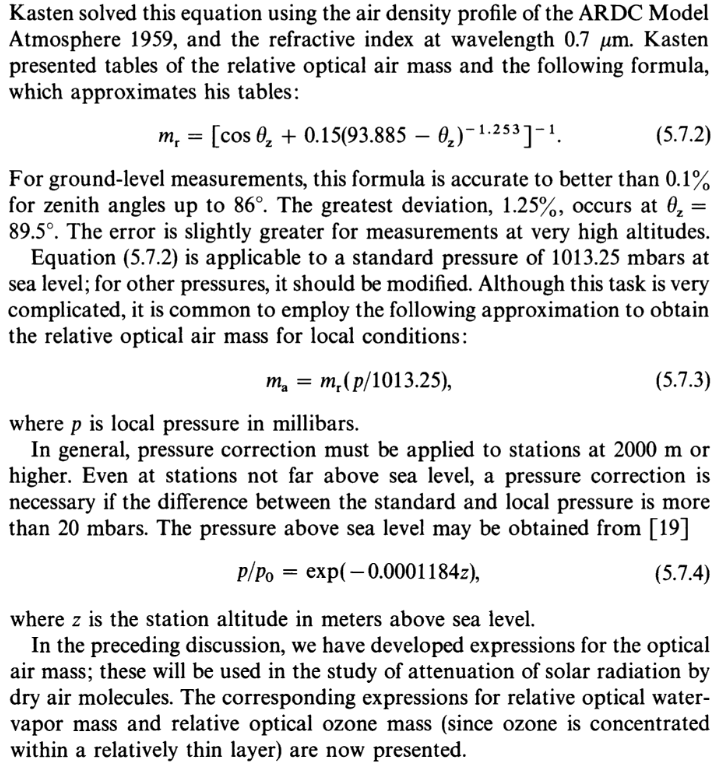

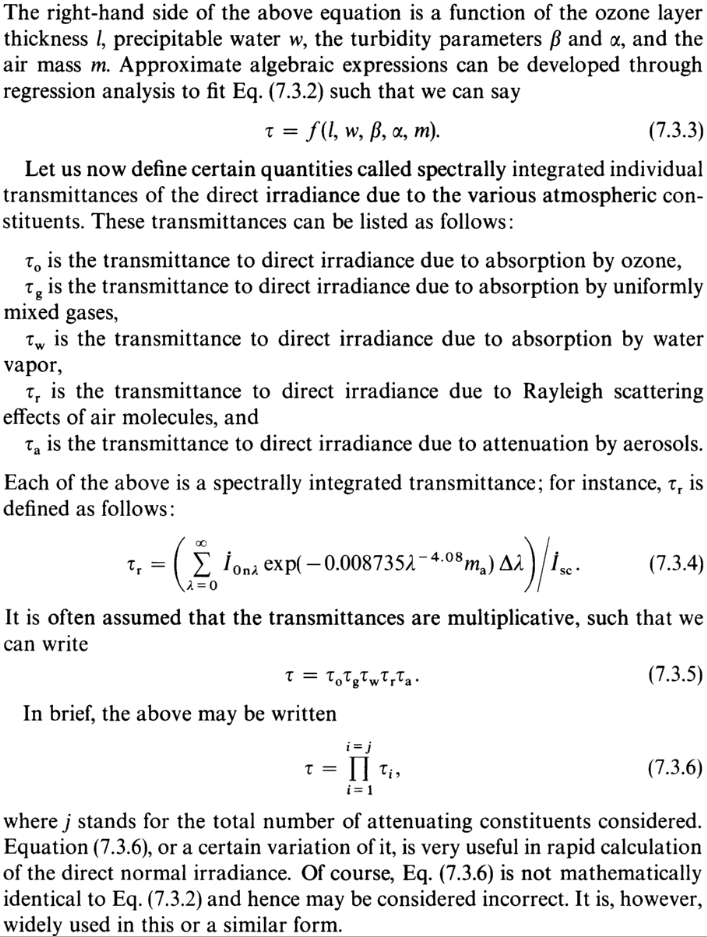

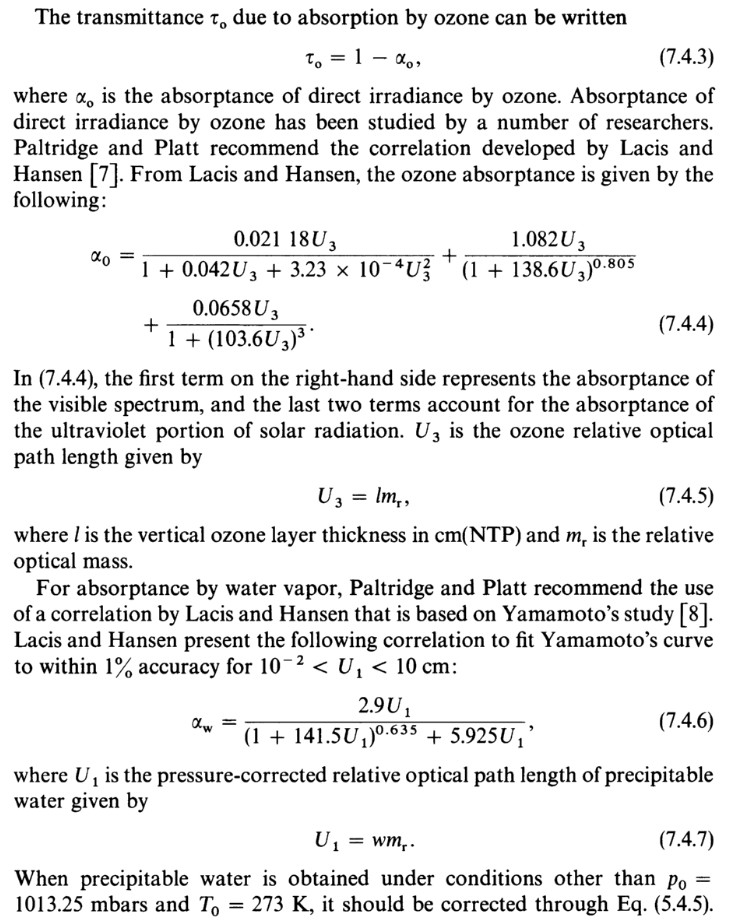

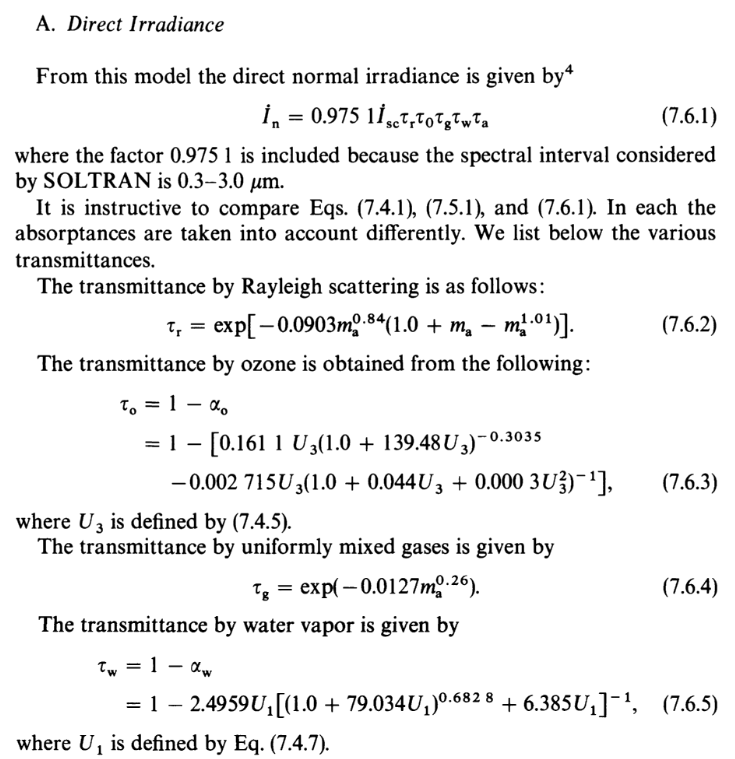

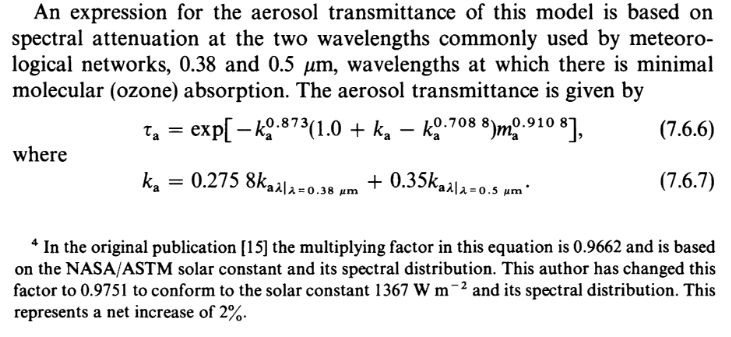

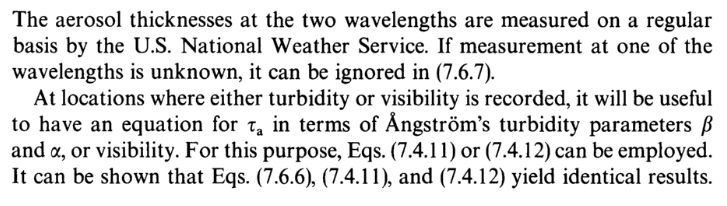

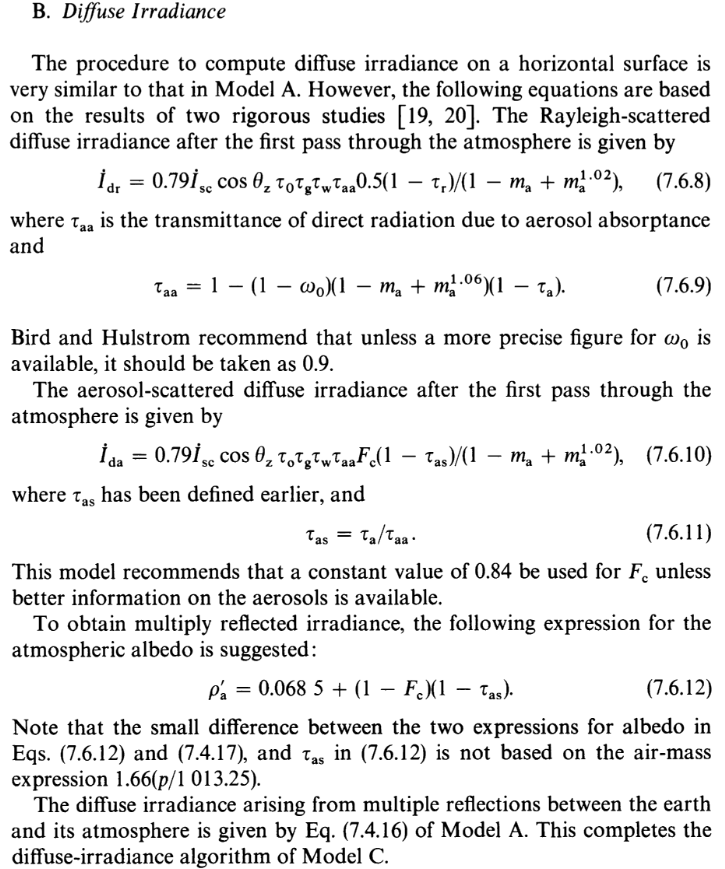

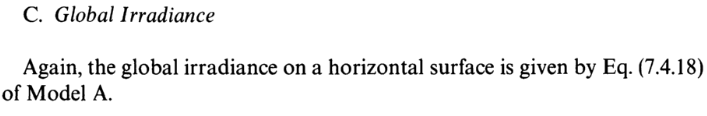

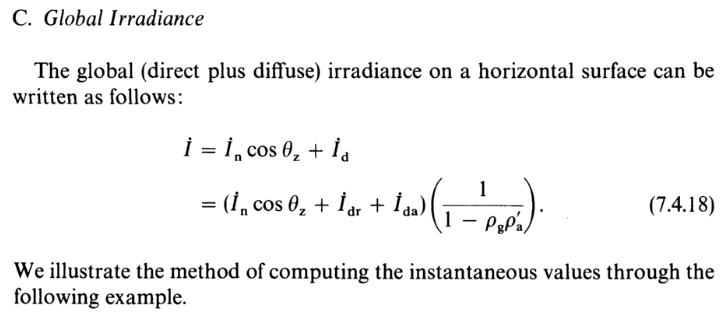

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Dia_J = # Día Juliano
Cte_Solar = 1367 # Constante Solar W/m^2
CteSolarJ = Cte_Solar*(1+0.033*math.cos(360*Dia_J/365)) # Constante solar en función del día juliano W/m^2

t_CTA = # Coeficiente de transmisibilidad atmosférica, transmitancias por dispersión 
fc = 0,9662 # Factor de corrección, se ajusta a las longitudes de onda de 0.3 a 3 um del espectro solar
TZ_sex =  # ThetaZenith en grados sexagesimales
#TZ_rad = TZ_sex*math.pi/180
PI = 3.14159265
TZ_rad = TZ_sex*PI/180 # ThetaZenith en radianes

lat = -12.0175705 # Latitud Facultad de Ciencias -12.0175705,-77.0508414
ang_diario = 2*PI*(Dia_J - l)/365
dec_Solar = (0.006918 - 0.399912*cos(ang_diario) + 0.070257*math.sin(ang_diario) - 0.006758*math.cos(2*ang_diario) + 0.000907*math.sin(2*ang_diario) - 0.002697*math.cos(3*ang_diario) + 0.00148*math.sin(3*ang_diario))*(180/PI) # Declinación Solar
ang_horario_cte_mitadDIA = np.arccos( — math.tan(lat)* math.tan(dec_Solar)) # grados sexagesimales
hora_dia= # Horas
#15 grados sexagesimales var_angulo_horario <> 1 hora
#Fin_dia = 12 + ang_horario_mitadDIA/15 #Horas
Inicio_dia = 12 - ang_horario_cte_mitadDIA / 15 #Horas 5:45

ang_horario = (12 - hora_dia) * ang_horario_cte_mitadDIA * PI/ [(12 - Inicio_dia)*180]

CosenoTZ = math.sen(lat)*math.sen(dec_Solar) + math.cos(lat)*math.cos(dec_Solar)*math.cos(ang_horario)
I_DH = fc*CteSolarJ*t_CTA*CosenoTZ

#I_DH = fc*CteSolarJ*t_CTA*math.cos(TZ_rad) # Radiación solar directa en superficie horizontal

k_d = 
I_dH = CteSolarJ*k_d*math.cos(TZ_rad)
I_TOTAL = I_DH + I_dH

In [2]:
path='D:/Anaconda/WeatherData/Data/'
df1 = pd.read_csv(path + 'UNI_EMDI-LabSolar_fd07122022.txt', sep="\t")
df1.head()

C:\Users\PABLO\AppData\Local\Temp\ipykernel_14572\2870946907.py:2: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path + 'UNI_EMDI-LabSolar_fd07122022.txt', sep="\t")


Unnamed: 0 Unnamed: 1  Temp    Hi   Low  Out   Dew   Wind Wind.1 Wind.2  \
0       Date       Time   Out  Temp  Temp  Hum   Pt.  Speed    Dir    Run   
1   13/10/19      11:00  18.3  18.4  18.3   78  14.4    1.3    WNW   0.80   
2   13/10/19      11:10  18.1  18.3  18.1   79  14.4    1.8    WNW   1.07   
3   13/10/19      11:20  18.2  18.2  18.1   79  14.5    1.3    WNW   0.80   
4   13/10/19      11:30  18.2  18.3  18.2   79  14.5    1.3    WNW   0.80   

   ...   In In .1 In .2 In .3   In Air Unnamed: 33 Wind.4 Wind.5    ISS   Arc.  
0  ...  Hum   Dew  Heat   EMC  Density         ET    Samp    Tx   Recept  Int.  
1  ...   50  13.6  24.7  9.22   1.1716       0.004    234      1   100.0    10  
2  ...   50  13.6  24.7  9.22   1.1717       0.000    235      1   100.0    10  
3  ...   50  13.6  24.7  9.22   1.1714       0.000    234      1   100.0    10  
4  ...   50  13.7  24.8  9.22   1.1712       0.000    234      1   100.0    10  

[5 rows x 38 columns]

In [3]:
df1.dtypes

Unnamed: 0     object
Unnamed: 1     object
Temp           object
Hi             object
Low            object
Out            object
Dew            object
Wind           object
Wind.1         object
Wind.2         object
Hi.1           object
Hi.2           object
Wind.3         object
Heat           object
THW            object
THSW           object
Unnamed: 16    object
Unnamed: 17    object
Rain           object
Solar          object
Solar.1        object
Hi Solar       object
UV             object
UV .1          object
Hi             object
Heat.1         object
Cool           object
In             object
In             object
In .1          object
In .2          object
In .3          object
In Air         object
Unnamed: 33    object
Wind.4         object
Wind.5         object
ISS            object
Arc.           object
dtype: object

In [4]:
df1.iloc[:, [0,1,2,19]]

Unnamed: 0 Unnamed: 1  Temp Solar
0            Date       Time   Out  Rad.
1        13/10/19      11:00  18.3   112
2        13/10/19      11:10  18.1    93
3        13/10/19      11:20  18.2    95
4        13/10/19      11:30  18.2   108
...           ...        ...   ...   ...
165488   07/12/22      20:10  18.9     0
165489   07/12/22      20:20  18.9     0
165490   07/12/22      20:30  18.8     0
165491   07/12/22      20:40  18.8     0
165492   07/12/22      20:50  18.7     0

[165493 rows x 4 columns]

In [5]:
col01=df1['Unnamed: 0']
col02=df1['Unnamed: 1']
col03=df1['Temp']
col04=df1['Solar']
horizontal_stack = pd.concat([col01, col02, col03, col04], axis=1) # apilamiento horizontal (axis=1)
horizontal_stack

Unnamed: 0 Unnamed: 1  Temp Solar
0            Date       Time   Out  Rad.
1        13/10/19      11:00  18.3   112
2        13/10/19      11:10  18.1    93
3        13/10/19      11:20  18.2    95
4        13/10/19      11:30  18.2   108
...           ...        ...   ...   ...
165488   07/12/22      20:10  18.9     0
165489   07/12/22      20:20  18.9     0
165490   07/12/22      20:30  18.8     0
165491   07/12/22      20:40  18.8     0
165492   07/12/22      20:50  18.7     0

[165493 rows x 4 columns]

In [6]:
path='D:/Anaconda/WeatherData/Data/'
horizontal_stack.to_csv(path + 'SelecData.txt', index=False) # Crea archivo con la data seccionada
df2 = pd.read_csv(path + 'SelecData.txt', header=None, names=['Date', 'Time', 'Temp_out', 'Solar_Rad']) # Agrega encabezado
df2.head()

C:\Users\PABLO\AppData\Local\Temp\ipykernel_14572\3907702207.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path + 'SelecData.txt', header=None, names=['Date', 'Time', 'Temp_out', 'Solar_Rad']) # Agrega encabezado


Date        Time Temp_out Solar_Rad
0  Unnamed: 0  Unnamed: 1     Temp     Solar
1        Date        Time      Out      Rad.
2    13/10/19       11:00     18.3       112
3    13/10/19       11:10     18.1        93
4    13/10/19       11:20     18.2        95

In [7]:
path='D:/Anaconda/WeatherData/Data/'
df2.drop([0,1],axis=0).to_csv(path + 'SelecData.txt',index=False) # Eliminar de manera vertical (axis=0)
pd.read_csv(path + 'SelecData.txt')

C:\Users\PABLO\AppData\Local\Temp\ipykernel_14572\2991796292.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(path + 'SelecData.txt')


Date   Time Temp_out Solar_Rad
0       13/10/19  11:00     18.3       112
1       13/10/19  11:10     18.1        93
2       13/10/19  11:20     18.2        95
3       13/10/19  11:30     18.2       108
4       13/10/19  11:40     18.1       136
...          ...    ...      ...       ...
165487  07/12/22  20:10     18.9         0
165488  07/12/22  20:20     18.9         0
165489  07/12/22  20:30     18.8         0
165490  07/12/22  20:40     18.8         0
165491  07/12/22  20:50     18.7         0

[165492 rows x 4 columns]

In [8]:
path='D:/Anaconda/WeatherData/Data/'
df3 = pd.read_csv(path + 'SelecData.txt', sep=",")
df3.head()

C:\Users\PABLO\AppData\Local\Temp\ipykernel_14572\954093571.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(path + 'SelecData.txt', sep=",")


Date   Time Temp_out Solar_Rad
0  13/10/19  11:00     18.3       112
1  13/10/19  11:10     18.1        93
2  13/10/19  11:20     18.2        95
3  13/10/19  11:30     18.2       108
4  13/10/19  11:40     18.1       136

In [9]:
df3.shape

(165492, 4)

In [10]:
df3.describe()

Date    Time Temp_out Solar_Rad
count     165492  165492   165492    165492
unique      1152     288      328      2095
top     05/02/20   19:10     17.3         0
freq         191    1151     1780     66354

Se ha separado las columnas. Falta ver los huecos de manera temporal.

KeyError: "None of [Float64Index([     0.0,      1.0,      2.0,      3.0,      4.0,      5.0,\n                   6.0,      7.0,      8.0,      9.0,\n              ...\n              165482.0, 165483.0, 165484.0, 165485.0, 165486.0, 165487.0,\n              165488.0, 165489.0, 165490.0, 165491.0],\n             dtype='float64', length=165492)] are in the [columns]"

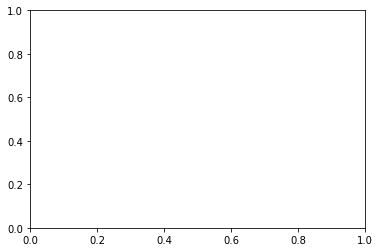

In [11]:
df3.plot(x=np.linspace(0, 165491, num=165492, endpoint=True), y='Solar_Rad', kind='scatter')
plt.show()